# **Sanou Faye, BBA25**

# Credit Card Fraud Detection using Random Forest

Predicting Credit Card Fraudulent Transactions

# Problem:

1) Fraud detection is a truly important problem to any e-commerce store, and companies put a lot of money to prevention because a single fraud can cost them a lot of money as well.

2) One of the biggest issues with this problem is that the vast majority of users will not be fraudulent.It is estimated that only 0.1% of online transactions are fraudulent, but given the volume of transactions that occur every day, that means a lot of money.

This will make it harder for us to detect the underlying patterns with the information available. This will cause our dataset to be highly imbalanced, so we need to use different sample techniques and use different metrics.

Thus, we are going to see how we can help solve this problem using Deep Learning algorithms using tools such as Python, TensorFlow and Keras.

# Case Study

We use a publicly available data set for these real credit card transactions that have been anonymized. This data contains over 300000 rows of transactions, all with their corresponding labels.

We are going to use the transaction history of many rows of sales to build a fraud detection system.

We have only numbers in the columns, as it has been anonymized, that means we don’t know which of the transactions attributes, such as the user’s IP location, how long he’s been one of our users, etc. Instead, we have numerical values that represent the same information.

# OUR OBJECTIVE:

To build a fraud detection classifier that, given a new transaction, can tell us if it is fraudulent or not with a correspondent confidence level. # Which are our classes? :

“0” label = Classifier is NOT fraudulent
“1” label (classifier IS fraudulent)

Build both a deep learning network to try to do so, as well as Random Forest.




### Step 1: Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
pip install tensorflow

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

### Step 2: Load, explore and preprocess the data

In [4]:
data = pd.read_csv('creditcard.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239668,150212.0,1.741212,-0.619975,-0.985615,1.639244,-0.193912,0.069383,-0.072027,0.082064,1.384739,...,-0.295479,-0.830908,0.193195,0.593100,-0.035776,-0.852391,0.003540,-0.021837,120.00,0.0
239669,150213.0,0.006621,0.053112,-0.467206,-1.743334,-0.145612,-0.599025,-0.159184,0.316879,0.981037,...,0.518906,1.481510,0.388084,0.565318,-2.071802,0.007606,0.260501,0.277826,46.13,0.0
239670,150213.0,2.011004,-0.687015,0.287436,-0.649200,-1.319287,-0.568292,-1.073079,-0.043251,1.822130,...,0.222584,0.971156,0.225766,0.161376,-0.499634,0.672209,0.014214,-0.035713,1.00,0.0
239671,150213.0,-0.796662,1.360761,-0.292435,-0.407823,1.946504,-0.901770,1.898670,-0.434640,-0.200602,...,-0.048103,-0.028189,-0.438090,0.423479,0.738254,-0.731429,-0.348427,-0.108167,1.00,0.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239673 entries, 0 to 239672
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    239673 non-null  float64
 1   V1      239673 non-null  float64
 2   V2      239673 non-null  float64
 3   V3      239673 non-null  float64
 4   V4      239673 non-null  float64
 5   V5      239673 non-null  float64
 6   V6      239673 non-null  float64
 7   V7      239673 non-null  float64
 8   V8      239673 non-null  float64
 9   V9      239673 non-null  float64
 10  V10     239673 non-null  float64
 11  V11     239673 non-null  float64
 12  V12     239673 non-null  float64
 13  V13     239673 non-null  float64
 14  V14     239673 non-null  float64
 15  V15     239673 non-null  float64
 16  V16     239673 non-null  float64
 17  V17     239673 non-null  float64
 18  V18     239672 non-null  float64
 19  V19     239672 non-null  float64
 20  V20     239672 non-null  float64
 21  V21     23

##### There is one row with an NAN value so we can delete it.

In [6]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 239672 entries, 0 to 239671
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    239672 non-null  float64
 1   V1      239672 non-null  float64
 2   V2      239672 non-null  float64
 3   V3      239672 non-null  float64
 4   V4      239672 non-null  float64
 5   V5      239672 non-null  float64
 6   V6      239672 non-null  float64
 7   V7      239672 non-null  float64
 8   V8      239672 non-null  float64
 9   V9      239672 non-null  float64
 10  V10     239672 non-null  float64
 11  V11     239672 non-null  float64
 12  V12     239672 non-null  float64
 13  V13     239672 non-null  float64
 14  V14     239672 non-null  float64
 15  V15     239672 non-null  float64
 16  V16     239672 non-null  float64
 17  V17     239672 non-null  float64
 18  V18     239672 non-null  float64
 19  V19     239672 non-null  float64
 20  V20     239672 non-null  float64
 21  V21     239672 

In [7]:
input_cols = [col for col in data.columns if col != 'Class']
output_cols = ['Class']

X = data[input_cols]
Y = data[output_cols]

print(X.shape,Y.shape)

(239672, 30) (239672, 1)


In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

### Step 3: Define Entropy and Information Gain

In [9]:
def entropy(col):

    values, counts = np.unique(col, return_counts=True)
    probabilities = counts / len(col)

    ent = -np.sum(probabilities * np.log2(probabilities))


    return ent

In [10]:
def divide_data(x_data, fkey, fval):
    x_left = x_data[x_data[fkey] <= fval]
    x_right = x_data[x_data[fkey] > fval]
    return x_left, x_right


In [11]:
x_left,x_right = divide_data(data[:10],'V1',0.5)
print(x_left)
print(x_right)

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
5   2.0 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   
7   7.0 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
8   7.0 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818  0.370145   
9   9.0 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761  0.651583   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.

In [12]:
def information_gain(x_data,fkey,fval):

    left,right = divide_data(x_data,fkey,fval)

    # % of total samples are on left and right
    l = float(left.shape[0])/x_data.shape[0]
    r = float(right.shape[0])/x_data.shape[0]

    # All examples come to one side!
    # It means that we have reached a node where we cannot do further splitting of the data
    if left.shape[0] == 0 or right.shape[0] ==0:
        return -1000000 # Min Information Gain # return -infinity

    parent_entropy = entropy(x_data['Class'])
    child_entropy = l * entropy(left['Class']) + r * entropy(right['Class'])

    # Calculate information gain
    i_gain = parent_entropy - child_entropy

    return i_gain

In [13]:
# Test our function
for fx in X.columns:
    print(fx)
    print(information_gain(data,fx,data[fx].mean()))

Time
4.372262961998413e-06
V1
0.00048451511360216026
V2
0.0008306809611616922
V3
0.0015422348257328918
V4
0.0015047006146085493
V5
0.0002705869645854668
V6
0.00028975198974001
V7
0.00073271918299566
V8
0.00015574531039280748
V9
0.0007460290990104652
V10
0.0008997556757250405
V11
0.0012503089353850076
V12
0.0017688071771507947
V13
2.4234676061080096e-08
V14
0.0014698399233887688
V15
4.398576099056556e-05
V16
0.0008061398487839051
V17
0.00041646810704553533
V18
0.00036970793048211187
V19
0.0002199584111498773
V20
0.0002831694336416987
V21
0.00048230307806518963
V22
2.2237128339576417e-06
V23
1.2304455237505119e-05
V24
3.410083292700733e-05
V25
7.068927241858647e-06
V26
2.6637582560239126e-06
V27
0.0002680217452155284
V28
4.397735982591272e-05
Amount
0.00010052902546862919


## Deep learning

In [14]:
# Target variable for deep learning
Y_train_categorical = to_categorical(Y_train, num_classes=2)
Y_test_categorical = to_categorical(Y_test, num_classes=2)

In [15]:
# Build the neural network model
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(2, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
# Compile the model
nn_model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

# Train the model
history = nn_model.fit(X_train, Y_train_categorical,
                        epochs=20,
                        batch_size=32,
                        validation_split=0.2,
                        verbose=1)

Epoch 1/20
4794/4794 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9845 - loss: 162.4961 - val_accuracy: 0.9984 - val_loss: 0.0780
Epoch 2/20
4794/4794 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - accuracy: 0.9975 - loss: 0.5702 - val_accuracy: 0.9984 - val_loss: 0.0139
Epoch 3/20
4794/4794 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9980 - loss: 0.0535 - val_accuracy: 0.9984 - val_loss: 0.0133
Epoch 4/20
4794/4794 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9979 - loss: 0.0416 - val_accuracy: 0.9984 - val_loss: 0.0152
Epoch 5/20
4794/4794 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9980 - loss: 0.0239 - val_accuracy: 0.9984 - val_loss: 0.0193
Epoch 6/20
4794/4794 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.9980 - loss: 0.0196 - val_accuracy: 0.9984 - val_loss: 0.0289
Epoch 7/20
4794/4794 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.9981 - loss: 0.0440 - val_accuracy: 0.9984 - val_loss: 0.0383
Epoch 8/20
4794/4794 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - accuracy: 0.9981 - loss:

In [17]:
nn_eval = nn_model.evaluate(X_test, Y_test_categorical)
print(f"Neural Network Test Loss: {nn_eval[0]:.4f}")
print(f"Neural Network Test Accuracy: {nn_eval[1]:.4f}")

1498/1498 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9980 - loss: 0.0151
Neural Network Test Loss: 0.0152
Neural Network Test Accuracy: 0.9982


## Random Forest

In [18]:
model = RandomForestClassifier(random_state=42)

In [19]:

model.fit(X_train, Y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [20]:
# Make predictions
Y_pred = model.predict(X_test)

In [21]:
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("Classification Report:\n", classification_report(Y_test, Y_pred))
print("Accuracy Score:", accuracy_score(Y_test, Y_pred))

Confusion Matrix:
 [[47846     2]
 [   17    70]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     47848
         1.0       0.97      0.80      0.88        87

    accuracy                           1.00     47935
   macro avg       0.99      0.90      0.94     47935
weighted avg       1.00      1.00      1.00     47935

Accuracy Score: 0.9996036299155105


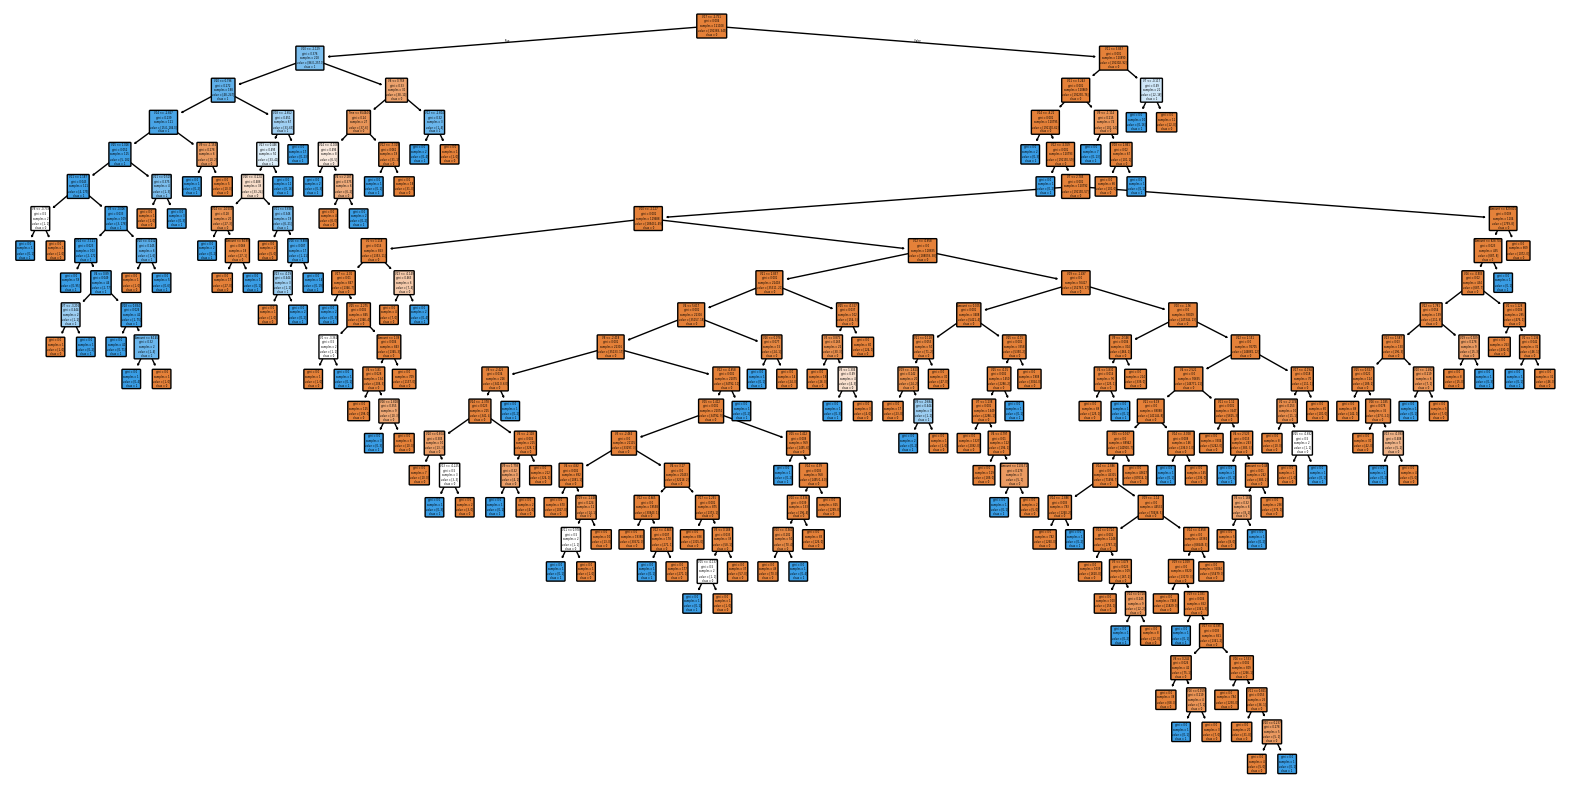

In [23]:
# Visualise the random forest

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(model.estimators_[0], filled=True, feature_names=X.columns, class_names=['0','1'], rounded=True)
plt.show()

# **Sanou Faye, BBA-25**